In [ ]:
#importing Libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from ipywidgets import interact

plt.style.use('fivethirtyeight')


In [ ]:
#lets read the dataset
matches = pd.read_csv('/content/matches.csv')

#lets check the shape these datasets
print("Shape of Matches Dataset : ", matches.shape)

Shape of Matches Dataset :  (756, 18)


In [ ]:
matches.columns

Index(['id', 'Season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

**Summarizing Interesting Fact from the Data**

In [ ]:
# Lets check the total number of cities venues associated with thw IPL matches
print("Total number of Teams:",matches['team1'].nunique())
print("Total number of Seasons:",matches['Season'].nunique())
print("Total number of Cities:",matches['city'].nunique())
print("Total number of Venues:",matches['venue'].nunique())

Total number of Teams: 15
Total number of Seasons: 12
Total number of Cities: 32
Total number of Venues: 41


In [ ]:
# Lets check the name of cities also

cities = set(matches['city'].unique())
print(cities)

{nan, 'Chandigarh', 'Kolkata', 'Mohali', 'Raipur', 'Durban', 'Jaipur', 'Port Elizabeth', 'Dharamsala', 'Bloemfontein', 'Nagpur', 'Mumbai', 'Rajkot', 'Johannesburg', 'Hyderabad', 'Sharjah', 'Bengaluru', 'Visakhapatnam', 'Ranchi', 'Bangalore', 'Ahmedabad', 'Kimberley', 'Delhi', 'East London', 'Abu Dhabi', 'Kanpur', 'Centurion', 'Cuttack', 'Chennai', 'Indore', 'Pune', 'Kochi', 'Cape Town'}


In [ ]:
# As we can see that we have Bengaluru and Banglore Both in the Data we have change Bangalore as Bengaluru
matches['city'] = matches['city'].replace(('Bangalore'),('Bengaluru'))

#lets check the city names again
cities = set(matches['city'].unique())
print(cities)

{nan, 'Chandigarh', 'Kolkata', 'Mohali', 'Raipur', 'Durban', 'Jaipur', 'Port Elizabeth', 'Dharamsala', 'Bloemfontein', 'Nagpur', 'Mumbai', 'Rajkot', 'Johannesburg', 'Hyderabad', 'Sharjah', 'Bengaluru', 'Visakhapatnam', 'Ranchi', 'Ahmedabad', 'Kimberley', 'Delhi', 'East London', 'Abu Dhabi', 'Kanpur', 'Centurion', 'Cuttack', 'Chennai', 'Indore', 'Pune', 'Kochi', 'Cape Town'}


In [ ]:
# Lets find all the Umpires who had umpired for the Matches

ump_1 = set(matches['umpire1'].unique())
ump_2 = set(matches['umpire2'].unique())
ump_3 = set(matches['umpire3'].unique())

ump = ump_1.intersection(ump_2)
ump = ump.intersection(ump_3)

print("The Number of Umpires: ", len(ump))
print("Names of The Umpires: ",ump)

The Number of Umpires:  20
Names of The Umpires:  {nan, 'C Shamshuddin', 'A Nanda Kishore', 'Yeshwant Barde', 'Vineet Kulkarni', 'Rod Tucker', 'Nigel Llong', 'KN Ananthapadmanabhan', 'S Ravi', 'Bruce Oxenford', 'Ian Gould', 'K Ananthapadmanabhan', 'Nitin Menon', 'O Nandan', 'Chris Gaffaney', 'Anil Dandekar', 'Anil Chaudhary', 'Kumar Dharmasena', 'Nanda Kishore', 'Ulhas Gandhe'}


In [ ]:
# Lets find out all those matches where there were no umpires at all.

matches[(matches['umpire1'].isnull()) &
        (matches['umpire2'].isnull()) &
        (matches['umpire3'].isnull())][['date','team1','team2','winner','umpire1','umpire2','umpire3']].reset_index(drop = True)

,date,team1,team2,winner,umpire1,umpire2,umpire3
0,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,NaN,NaN,NaN
1,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,NaN,NaN,NaN


**Exploring the Best Players from IPL**

In [ ]:
# Lets know more about the Player of the Matches 
print('Number of Players who have won the "Title of Player of the Match"',matches['player_of_match'].nunique())

# Lets get the Names of Top 10 Player of the Matches
matches['player_of_match'].value_counts().sort_values(ascending = False).head(10)

Number of Players who have won the "Title of Player of the Match" 226


CH Gayle          21
AB de Villiers    20
RG Sharma         17
MS Dhoni          17
DA Warner         17
YK Pathan         16
SR Watson         15
SK Raina          14
G Gambhir         13
MEK Hussey        12
Name: player_of_match, dtype: int64

In [ ]:
# Lets check all those Matches where Chris Gayle Won the Title of "Player of the Match"

matches[matches['player_of_match'] == 'CH Gayle'][['date','team1','team2','winner']].reset_index(drop = True)

,date,team1,team2,winner
0,18-04-2017,Royal Challengers Bangalore,Gujarat Lions,Royal Challengers Bangalore
1,21-04-2009,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders
2,22-04-2011,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore
3,06-05-2011,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore
4,08-05-2011,Kochi Tuskers Kerala,Royal Challengers Bangalore,Royal Challengers Bangalore
5,14-05-2011,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore
6,22-05-2011,Chennai Super Kings,Royal Challengers Bangalore,Royal Challengers Bangalore
7,27-05-2011,Royal Challengers Bangalore,Mumbai Indians,Royal Challengers Bangalore
8,17-04-2012,Pune Warriors,Royal Challengers Bangalore,Royal Challengers Bangalore
9,20-04-2012,Kings XI Punjab,Royal Challengers Bangalore,Royal Challengers Bangalore


In [ ]:
# As it is clear that from the season IPL-2018 Gayle played for kings XI Punjab,
# lets analyze and compare kings XI Punjab and RCB After CH Gayle

after_gayle = matches[(matches['Season'] == 'IPL-2018') | (matches['Season'] == 'IPL-2019')]
after_gayle_rcb = after_gayle[(after_gayle['winner'] == 'Royal Challengers Bangalore') |
                               (after_gayle['winner'] == 'Kings XI Punjab')]

print('number of Matches won')
print(after_gayle_rcb['winner'].value_counts())

print("\nWin by Total Runs and Wickets")
print(after_gayle_rcb[['win_by_runs','win_by_wickets','winner']].groupby(['winner']).sum())

number of Matches won
Kings XI Punjab                12
Royal Challengers Bangalore    11
Name: winner, dtype: int64

Win by Total Runs and Wickets
                             win_by_runs  win_by_wickets
winner                                                  
Kings XI Punjab                       63              41
Royal Challengers Bangalore           56              37


In [ ]:
#total matches between KXIP and RCB after 2018
matches_won_rcb = matches[(matches['Season'] == 'IPL-2018') | (matches['Season'] == 'IPL-2019')]
matches_won_rcb = matches_won_rcb[((matches_won_rcb['team1'] == 'Royal Challengers Bangalore') &
                                  (matches_won_rcb['team2'] == 'Kings XI Punjab')) |
                                  ((matches_won_rcb['team1'] == 'Kings XI Punjab') &
                                  (matches_won_rcb['team2'] == 'Royal Challengers Bangalore')) 
                                 ]
matches_won_rcb[['Season','team1','team2','winner']]

,Season,team1,team2,winner
643,IPL-2018,Kings XI Punjab,Royal Challengers Bangalore,Royal Challengers Bangalore
683,IPL-2018,Kings XI Punjab,Royal Challengers Bangalore,Royal Challengers Bangalore
723,IPL-2019,Kings XI Punjab,Royal Challengers Bangalore,Royal Challengers Bangalore
737,IPL-2019,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore


In [ ]:
# Lets check all the Player of the Matches per season and per Team

@interact
def best_players(season = list(matches['Season'].value_counts().index),
                 team = list(matches['team1'].value_counts().index)):
    a = matches[(matches['Season'] == season) & (matches['team1'] == team)]
    return a['player_of_match'].value_counts()

interactive(children=(Dropdown(description='season', options=('IPL-2013', 'IPL-2012', 'IPL-2011', 'IPL-2010', …

**Discovering the Biggest Matches in IPL**


       win_by_runs  win_by_wickets
count   756.000000      756.000000
mean     13.283069        3.350529
std      23.471144        3.387963
min       0.000000        0.000000
25%       0.000000        0.000000
50%       0.000000        4.000000
75%      19.000000        6.000000
max     146.000000       10.000000


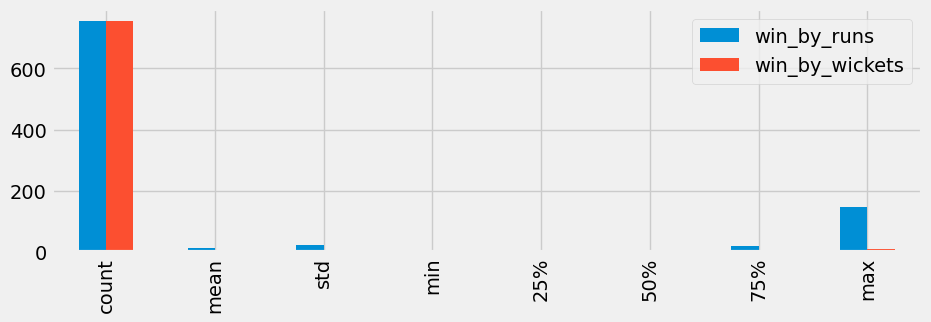

In [ ]:
#lets analyze the winning scores

print(matches[['win_by_runs', 'win_by_wickets']].describe())

plt.rcParams['figure.figsize']= (10,3)
matches[['win_by_runs', 'win_by_wickets']].describe().plot(kind = 'bar')
plt.show()

In [ ]:
# Lets check the Team who lost the Match by 146 Runs

matches[matches['win_by_runs'] == 146][['Season',
                                        'team1',
                                        'team2',
                                        'winner',
                                        'player_of_match']].reset_index(drop = True)

,Season,team1,team2,winner,player_of_match
0,IPL-2017,Mumbai Indians,Delhi Daredevils,Mumbai Indians,LMP Simmons


In [ ]:
# Lets check the Team who lost the Match by all the 10 wickets

matches[matches['win_by_wickets'] == 10][['Season',
                                        'team1',
                                        'team2',
                                        'winner',
                                        'player_of_match']].reset_index(drop = True)


,Season,team1,team2,winner,player_of_match
0,IPL-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,CA Lynn
1,IPL-2017,Delhi Daredevils,Kings XI Punjab,Kings XI Punjab,Sandeep Sharma
2,IPL-2008,Mumbai Indians,Deccan Chargers,Deccan Chargers,AC Gilchrist
3,IPL-2009,Kings XI Punjab,Delhi Daredevils,Delhi Daredevils,DL Vettori
4,IPL-2010,Rajasthan Royals,Royal Challengers Bangalore,Royal Challengers Bangalore,JH Kallis
5,IPL-2011,Mumbai Indians,Rajasthan Royals,Rajasthan Royals,SR Watson
6,IPL-2012,Rajasthan Royals,Mumbai Indians,Mumbai Indians,DR Smith
7,IPL-2013,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,MEK Hussey
8,IPL-2015,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,VR Aaron
9,IPL-2016,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,B Kumar


In [ ]:
## Lets compare M<umbai Indians and Chennai Super kings


MumbaiIndians = matches[(matches['team1']== 'Mumbai Indians') | (matches['team2'] == 'Mumbai Indians')]
ChennaiSuperKings = matches[(matches['team1']== 'Chennai Super Kings') | (matches['team2'] == 'Chennai Super Kings')]
royalchallengers = matches[(matches['team1']== 'Royal Challengers Bangalore') | (matches['team2'] == 'Royal Challengers Bangalores')]

data = MumbaiIndians.append(ChennaiSuperKings)
data = data.append(royalchallengers)
data = data[(data['winner'] == 'Mumbai Indians') | (data['winner'] == 'Chennai Super Kings') | 
            (data['winner'] == 'Royal Challengers Bangalore')]
data[['Season',
      'winner',
      'win_by_runs',
      'win_by_wickets',
      'player_of_match']].groupby(['winner']).agg(['min',
                                                   'mean',
                                                   'max',
                                                   'sum']).style.background_gradient(cmap = 'inferno')


<ipython-input-17-8ed7dcbcc010>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = MumbaiIndians.append(ChennaiSuperKings)
<ipython-input-17-8ed7dcbcc010>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(royalchallengers)
<ipython-input-17-8ed7dcbcc010>:12: FutureWarning: ['Season', 'player_of_match'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  data[['Season',


**Understanding the Matches Results**

In [ ]:
 #let the types of matches results

 matches['result'].value_counts()

normal       743
tie            9
no result      4
Name: result, dtype: int64

In [ ]:
# lets check the Probabilty of matches where we can see normal, tie or no result scenarios

normal = matches[matches['result'] == 'normal']
tie = matches[matches['result'] == 'tie']
no_result = matches[matches['result'] == 'no result']

print("percentage of matches where result is 'normal': ",round(normal.shape[0]/matches.shape[0],2) *100)
print("percentage of matches where result is 'tie': ",round(tie.shape[0]/matches.shape[0],2) *100)
print("percentage of matches where result is 'no result': ",round(no_result.shape[0]/matches.shape[0],2) *100)

percentage of matches where result is 'normal':  98.0
percentage of matches where result is 'tie':  1.0
percentage of matches where result is 'no result':  1.0


In [ ]:
# as we can see that there are only few matches where tie and no result, so lets check them

print("Teams where tie Happened")
print(matches[matches['result'] == 'tie'][['date','team1','team2']].reset_index(drop = True))
print("\n")
print("Teams where there was no result")
print(matches[matches['result'] == 'no result'][['date','team1','team2']].reset_index(drop = True))

Teams where tie Happened
         date                        team1                        team2
0  29-04-2017                Gujarat Lions               Mumbai Indians
1  23-04-2009             Rajasthan Royals        Kolkata Knight Riders
2  21-03-2010              Kings XI Punjab          Chennai Super Kings
3  07-04-2013  Royal Challengers Bangalore          Sunrisers Hyderabad
4  16-04-2013             Delhi Daredevils  Royal Challengers Bangalore
5  29-04-2014             Rajasthan Royals        Kolkata Knight Riders
6  21-04-2015             Rajasthan Royals              Kings XI Punjab
7  30-03-2019        Kolkata Knight Riders               Delhi Capitals
8  02-05-2019               Mumbai Indians          Sunrisers Hyderabad


Teams where there was no result
         date                        team1                        team2
0  21-05-2011             Delhi Daredevils                Pune Warriors
1  29-04-2015  Royal Challengers Bangalore             Rajasthan Royals
2  17

**Uncovering the most poplar IPL Seasons and Teams**

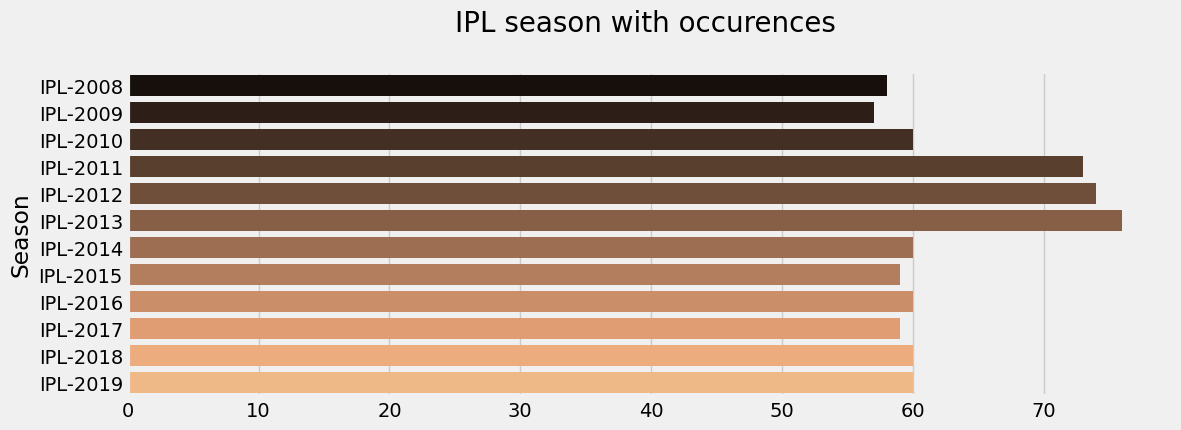

In [ ]:
# Lets check the number of IPL seasons

plt.rcParams['figure.figsize'] = (12,4)
sns.countplot(y = matches['Season'].sort_values(),palette = 'copper')
plt.title('IPL season with occurences \n', fontsize = 20)
plt.xlabel('')
plt.show()

<ipython-input-22-ea9802a1a371>:2: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  team = matches['team1'].append(matches['team2'])


<function matplotlib.pyplot.show(close=None, block=None)>

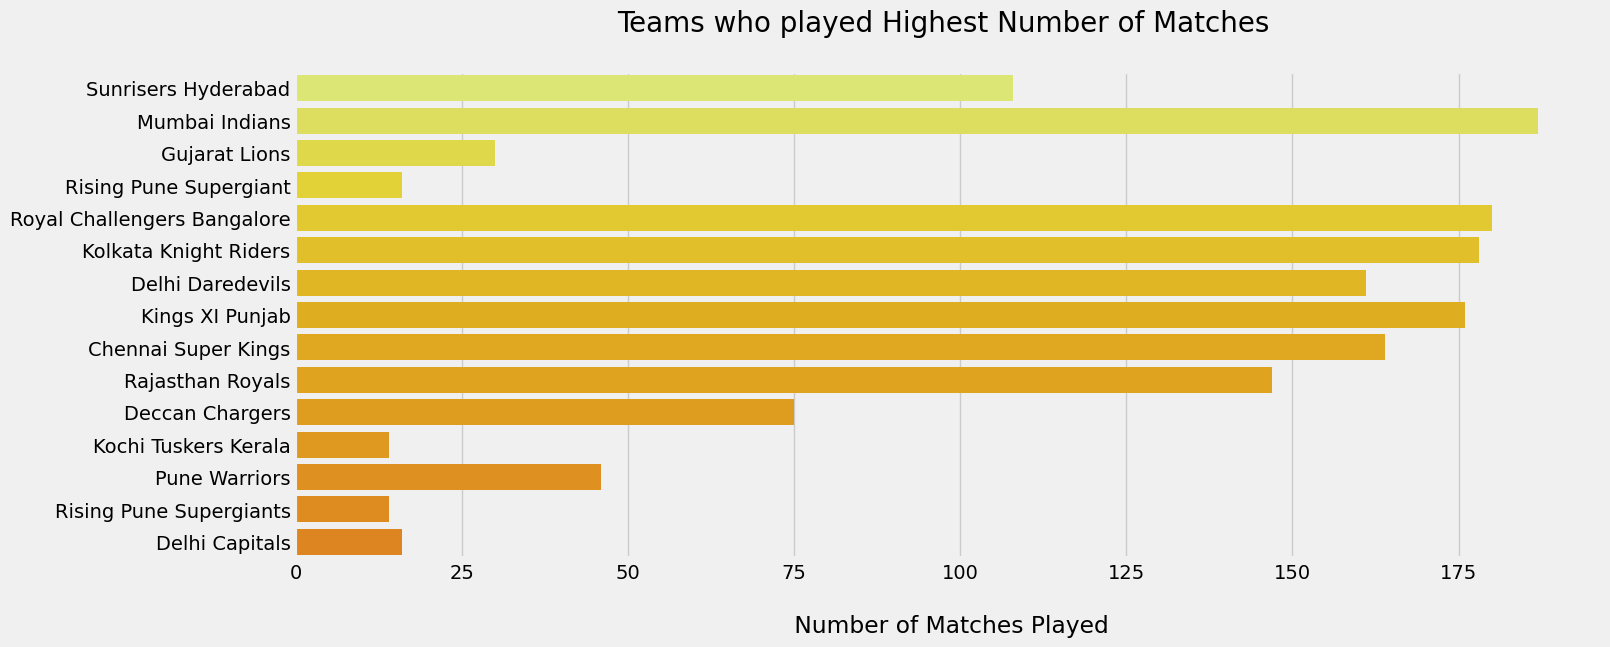

In [ ]:
# lets check the teams
team = matches['team1'].append(matches['team2'])

plt.rcParams['figure.figsize']= (15,6)
sns.countplot(y = team,palette = 'Wistia')
plt.title('Teams who played Highest Number of Matches \n', fontsize = 20)
plt.ylabel('')
plt.xlabel('\n Number of Matches Played')
plt.show

**Realizing the locations of all IPL Seasons**

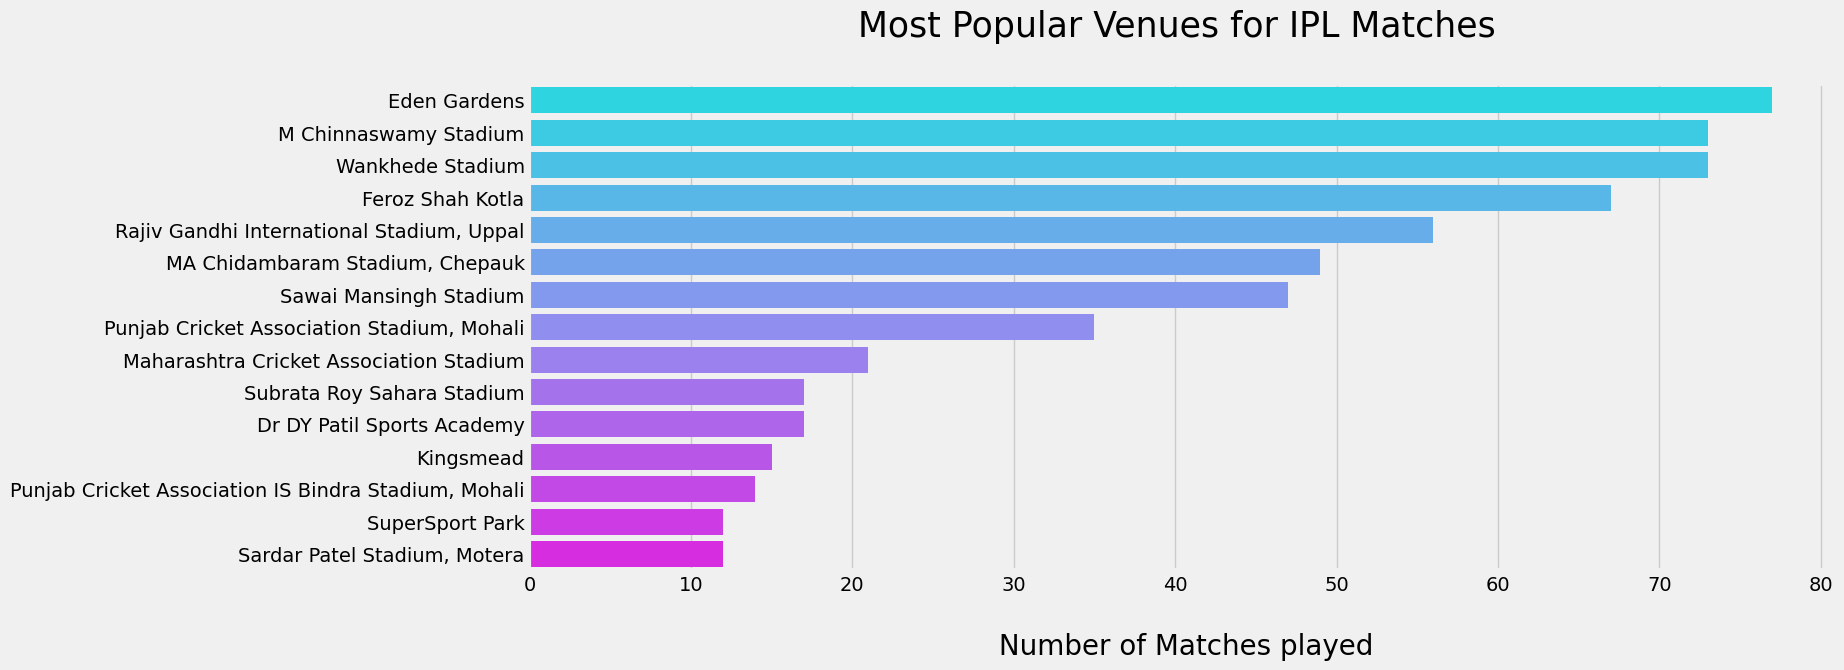

In [ ]:
## let explore the Vennues used for the IPL Matches the Most

plt.rcParams['figure.figsize'] = (15,6)
sns.barplot(y = matches['venue'].value_counts().head(15).index,
            x = matches['venue'].value_counts().head(15).values,
            palette = 'cool')
plt.title('Most Popular Venues for IPL Matches \n', fontsize = 25)
plt.xlabel('\n Number of Matches played',fontsize = 20)
plt.show()

In [ ]:
#lets check out in which cities the IPL Matches held out

def city(season):
    cities = matches.groupby(['Season','city'])['id'].agg('count').reset_index()
    cities.rename(columns= {'id':'count'}, inplace = True)
    return cities[cities['Season']==season].reset_index(drop=True).sort_values(by = 'count', ascending = True)

#lets test it out with IPL 2019
city('IPL-2017')

,Season,city,count
5,IPL-2017,Kanpur,2
4,IPL-2017,Indore,3
1,IPL-2017,Chandigarh,4
9,IPL-2017,Rajkot,5
2,IPL-2017,Delhi,7
6,IPL-2017,Kolkata,7
8,IPL-2017,Pune,7
0,IPL-2017,Bengaluru,8
3,IPL-2017,Hyderabad,8
7,IPL-2017,Mumbai,8


In [ ]:
# we can convert above function into anInteractive function

@interact
def city(season = list(matches['Season'].value_counts().index)):
    cities = matches.groupby(['Season','city'])['id'].agg('count').reset_index()
    cities.rename(columns= {'id':'count'}, inplace = True)
    return cities[cities['Season'] == season].reset_index(drop=True).sort_values(by = 'count',
                                                    ascending = False).style.background_gradient(cmap = 'Greens')                            

interactive(children=(Dropdown(description='season', options=('IPL-2013', 'IPL-2012', 'IPL-2011', 'IPL-2010', …

**Comparing Toss Winners and Winners**

In [ ]:
# Lets also check the total number of matches won by all the teams

matches['winner'].value_counts()

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Delhi Capitals                  10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

In [ ]:
# lets analyze what is the probability for a tean if they win the Toss

not_same = matches[matches['toss_winner'] != matches['winner']]
same = matches[matches['toss_winner'] == matches['winner']]

print("Percentage of matches where toss winner is not same as winner: ",round(not_same.shape[0]/matches.shape[0],4)*100)
print("Percentage of matches where toss winner is same as winner: ",round(same.shape[0]/matches.shape[0], 2)*100)

Percentage of matches where toss winner is not same as winner:  48.02
Percentage of matches where toss winner is same as winner:  52.0


In [ ]:
# teams who won when they won the Toss

def tosswin_wins(team):
  x = pd.crosstab(matches['toss_winner'],matches['winner'])
  return x[[team]].sort_values(by = team, ascending = False).style.background_gradient(cmap = 'copper')

#lets check this function with Mumbai Indians
tosswin_wins('Mumbai Indians')

winner,Mumbai Indians
toss_winner,
Mumbai Indians,56
Delhi Daredevils,9
Chennai Super Kings,7
Kolkata Knight Riders,7
Kings XI Punjab,6
Rajasthan Royals,6
Royal Challengers Bangalore,6
Deccan Chargers,4
Sunrisers Hyderabad,4


In [ ]:
# lets convert the above function into interactive  

@interact
def tosswin_wins(team = matches['team1'].value_counts().index):
  x = pd.crosstab(matches['toss_winner'],matches['winner'])
  return x[[team]].sort_values(by = team, ascending = False).style.background_gradient(cmap = 'Oranges')


interactive(children=(Dropdown(description='team', options=('Mumbai Indians', 'Kings XI Punjab', 'Chennai Supe…

**Checking the winning locations for all the team**

In [ ]:
# lets analyze the locations where a team won the match

def teams_winning_location(team):
  x = matches[['winner','city']]
  x = x[x['winner'] == team]
  return x['city'].value_counts()

# lets do the testing for the Mumbai Indians
teams_winning_location('Mumbai Indians')

Mumbai            53
Kolkata           10
Bengaluru          9
Hyderabad          7
Chennai            5
Pune               4
Chandigarh         4
Delhi              4
Jaipur             2
Visakhapatnam      2
Port Elizabeth     2
Indore             2
Centurion          1
East London        1
Cape Town          1
Rajkot             1
Ahmedabad          1
Name: city, dtype: int64

In [ ]:
# It seems that kolkata is lucky place for Mumbai Indians
# Lets check how many times other Teams have won in Kolkata 

a = matches[matches['city']  == 'Kolkata'][['winner']]
a['winner'].value_counts().iloc[1:]

Mumbai Indians                 10
Chennai Super Kings             5
Royal Challengers Bangalore     4
Kings XI Punjab                 3
Gujarat Lions                   2
Rajasthan Royals                2
Sunrisers Hyderabad             2
Rising Pune Supergiant          1
Kochi Tuskers Kerala            1
Delhi Daredevils                1
Delhi Capitals                  1
Name: winner, dtype: int64

In [ ]:
# lets convert the above function into interactive

@interact
def winning_locations(team = list(matches['team1'].value_counts().index)):
  z = matches[['winner','city']]
  z = z[z['winner'] == team]
  return z['city'].value_counts()

interactive(children=(Dropdown(description='team', options=('Mumbai Indians', 'Kings XI Punjab', 'Chennai Supe…

**Analyzing Toss decisions in IPL matches**

In [ ]:
# Lets see the type of toss decisions

matches['toss_decision'].value_counts()

field    463
bat      293
Name: toss_decision, dtype: int64

In [ ]:
# Probability of a team to win if they choose to field or bat

field = matches[matches['toss_decision'] == 'field']
bat = matches[matches['toss_decision'] == 'bat']

print("Percentage of matches where toss decision is 'field': ",round(field.shape[0]/matches.shape[0],2) * 100)
print("Percentage of matches where toss decision is 'bat': ",round(bat.shape[0]/matches.shape[0],2) * 100)

Percentage of matches where toss decision is 'field':  61.0
Percentage of matches where toss decision is 'bat':  39.0


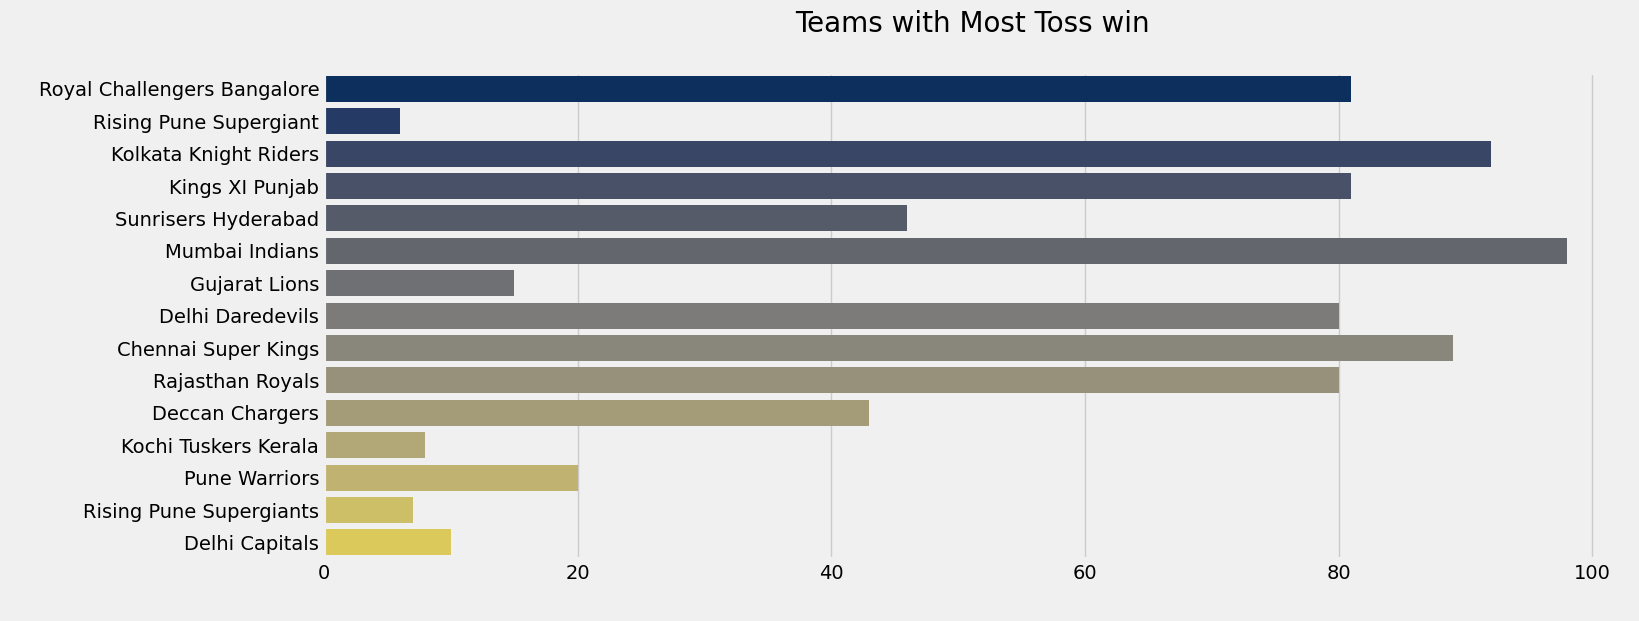

In [ ]:
# lets check how many times the IPL team Won the Toss

sns.countplot(y = matches['toss_winner'],
              palette = 'cividis')
plt.title('Teams with Most Toss win \n', fontsize = 20)
plt.xlabel(' ')
plt.ylabel(' ')
plt.show()

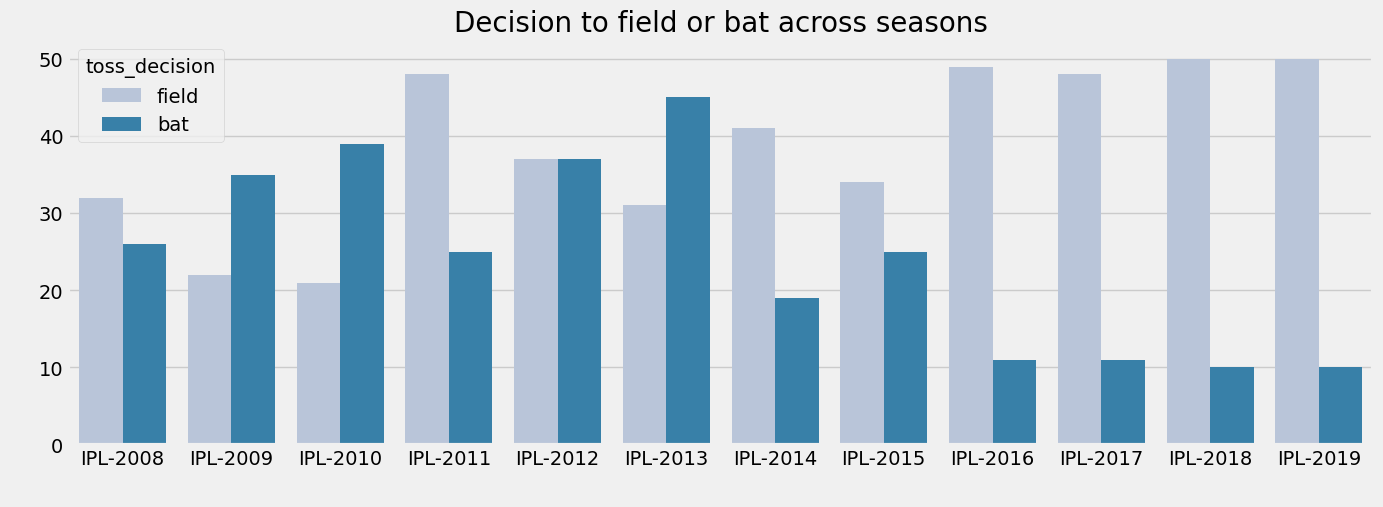

In [ ]:
# Lets compare the Toss Decisions

plt.rcParams['figure.figsize'] = (15,5)
sns.countplot(x = matches['Season'].sort_values(), hue = matches['toss_decision'], palette = 'PuBu')
plt.title("Decision to field or bat across seasons", fontsize = 20)
plt.xlabel(" ")
plt.ylabel(" ")
plt.show()

In [ ]:
# Lets see How the IPL Teams decide, whether to field or bat 

@interact
def toss_decission(team = list(matches['toss_winner'].value_counts().index),
                   ):
  x = matches[matches['toss_winner'] == team]
  return x['toss_decision'].value_counts()

interactive(children=(Dropdown(description='team', options=('Mumbai Indians', 'Kolkata Knight Riders', 'Chenna…

**What is DL in an IPL match ?**

In [ ]:
# Lets check the percentage of matches where DL is applied

dl_applied_no = matches[matches['dl_applied'] == 0]
dl_applied_yes = matches[matches['dl_applied'] == 1]

print('percentage of matches where DL is applied :', round(dl_applied_yes.shape[0]/matches.shape[0],2)* 100)
print('percentage of matches where DL is not applied :', round(dl_applied_no.shape[0]/matches.shape[0],2)*100)

percentage of matches where DL is applied : 3.0
percentage of matches where DL is not applied : 97.0


In [ ]:
#lets check the team who won the matches when DL is applied

a = matches[matches['dl_applied'] == 1]
a['winner'].value_counts()

Kolkata Knight Riders          4
Royal Challengers Bangalore    3
Kings XI Punjab                2
Chennai Super Kings            2
Delhi Daredevils               2
Sunrisers Hyderabad            2
Rising Pune Supergiants        2
Kochi Tuskers Kerala           1
Rajasthan Royals               1
Name: winner, dtype: int64

In [ ]:
# lets check the complete data of those matches where DL is applied 

matches[matches['dl_applied'] == 1][['Season','team1','team2','winner']]

,Season,team1,team2,winner
56,IPL-2017,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders
99,IPL-2008,Delhi Daredevils,Kings XI Punjab,Kings XI Punjab
102,IPL-2008,Kolkata Knight Riders,Chennai Super Kings,Chennai Super Kings
119,IPL-2009,Kings XI Punjab,Delhi Daredevils,Delhi Daredevils
122,IPL-2009,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders
148,IPL-2009,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings
251,IPL-2011,Chennai Super Kings,Kochi Tuskers Kerala,Kochi Tuskers Kerala
280,IPL-2011,Chennai Super Kings,Kolkata Knight Riders,Kolkata Knight Riders
290,IPL-2011,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore
488,IPL-2014,Delhi Daredevils,Sunrisers Hyderabad,Sunrisers Hyderabad
